## Read the dataset into a pandas dataframe

In [1]:
import pandas as pd

df = pd.read_csv('MBTI 500.csv')

In [2]:
df

posts  type
0       know intj tool use interaction people excuse a...  INTJ
1       rap music ehh opp yeah know valid well know fa...  INTJ
2       preferably p hd low except wew lad video p min...  INTJ
3       drink like wish could drink red wine give head...  INTJ
4       space program ah bad deal meing freelance max ...  INTJ
...                                                   ...   ...
106062  stay frustrate world life want take long nap w...  INFP
106063  fizzle around time mention sure mistake thing ...  INFP
106064  schedule modify hey w intp strong wing underst...  INFP
106065  enfj since january busy schedule able spend li...  INFP
106066  feel like men good problem tell parent want te...  INFP

[106067 rows x 2 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106067 entries, 0 to 106066
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   106067 non-null  object
 1   type    106067 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


### Posts are equal-sized: about 500 words per sample.

In [4]:
word_counts = df['posts'].apply(lambda x: len(str(x).split()))

In [5]:
word_counts

0         501
1         501
2         501
3         501
4         501
         ... 
106062    499
106063    499
106064    499
106065    499
106066    499
Name: posts, Length: 106067, dtype: int64

## Check null values

In [6]:
df.isnull().sum()

posts    0
type     0
dtype: int64

In [7]:
# 16 personality
df['type'].unique()

array(['INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP', 'ENFJ', 'ENFP',
       'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP', 'INFJ', 'INFP'],
      dtype=object)

In [8]:
print("They are {%s} types of classified MBTI posts." %(df['type'].unique()))

They are {['INTJ' 'INTP' 'ISFJ' 'ISFP' 'ISTJ' 'ISTP' 'ENFJ' 'ENFP' 'ENTJ' 'ENTP'
 'ESFJ' 'ESFP' 'ESTJ' 'ESTP' 'INFJ' 'INFP']} types of classified MBTI posts.


In [9]:
df.type.value_counts()

INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: type, dtype: int64

## Group by the type

In [10]:
groups = df.groupby('type')
groups.describe()

posts                                                               
      count unique                                                top freq
type                                                                      
ENFJ   1534   1534  something interest say generally worry underst...    1
ENFP   6167   6167  make point line precise effective thank viceve...    1
ENTJ   2955   2955  right xnfp lean infp maybe tell u childhood li...    1
ENTP  11725  11725  objective truth claim mean inherently bind sub...    1
ESFJ    181    181  thank mom isfj dad istj opinion valid basis ca...    1
ESFP    360    360  person really show love get know different sid...    1
ESTJ    482    482  aware really raw data really moment lonely est...    1
ESTP   1986   1986  prekindergarten care krippen everywhere coinci...    1
INFJ  14963  14963  never bother know still funny read though best...    1
INFP  12134  12134  know th grade grandmother die day want stay ho...    1
INTJ  22427  22427  kid come nearby become introvert instantly lol...    1
INTP  24961  24961  quantifiably wasteful disclaimer see people ta...    1
ISFJ    650    650  make whole thing force awkward hard end kind s...    1
ISFP    875    875  introvert embarrass express way deem necessary...    1
ISTJ   1243   1243  relevant experience oh wait yep also like squi...    1
ISTP   3424   3424  roommate something might interest might know s...    1

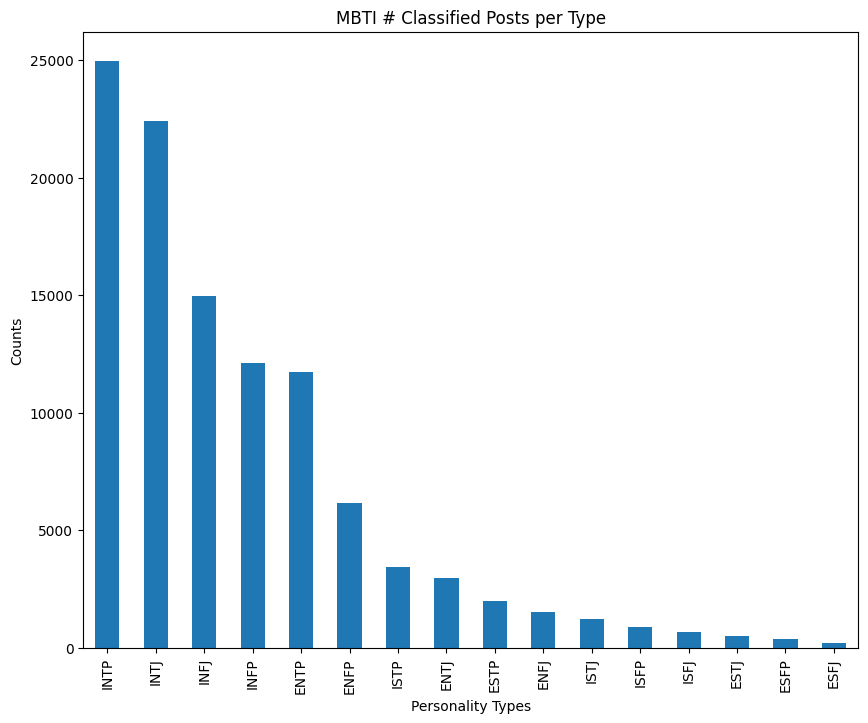

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
groups.size().sort_values(ascending=False).plot.bar()
plt.xlabel("Personality Types")
plt.ylabel("Counts")
plt.title("MBTI # Classified Posts per Type")
plt.show()

In [12]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/liuli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/liuli/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords

def preprocess_text(posts):
    # Tokenize the text into words
    words = posts.split(" ")
    
    # Remove stop words
    stoplist = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stoplist]
    
    # Stem the words
    stemmer = nltk.PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    
    # Extract linguistic features
    word_freq = nltk.FreqDist(words)
    
    return word_freq

# Analysis Posts

## ENFJ posts

In [14]:
# drop - to avoid the old index being added as a column
group_enfj = groups.get_group("ENFJ").reset_index(drop=True)
group_enfj

posts  type
0     yeah quite like idea actually think could numb...  ENFJ
1     idea thing thing value others perceive relevan...  ENFJ
2     respect say year sound bite silly might soft r...  ENFJ
3     interaction unavoidable witness student intern...  ENFJ
4     core probably see relationship work also sound...  ENFJ
...                                                 ...   ...
1529  entj w sx xd everything ok nothing sister lot ...  ENFJ
1530  entj istj suggest type think thank clarify who...  ENFJ
1531  porcelain youtube tell laura love ray paterson...  ENFJ
1532  usually terrify emotional pyro masochistic ben...  ENFJ
1533  estp quality fit good probably type character ...  ENFJ

[1534 rows x 2 columns]

In [15]:
enfj_posts = ""
for i in range(group_enfj.shape[0]):
    enfj_posts += group_enfj['posts'].iloc[i]

In [16]:
word_freq = preprocess_text(enfj_posts)

In [17]:
word_freq

FreqDist({'like': 11376, 'think': 9228, 'peopl': 8939, 'feel': 7426, 'get': 7195, 'make': 6290, 'know': 6276, 'thing': 5880, 'say': 5437, 'realli': 5413, ...})

Text(0.5, 1.0, 'Word frequency of ENFJ posts')

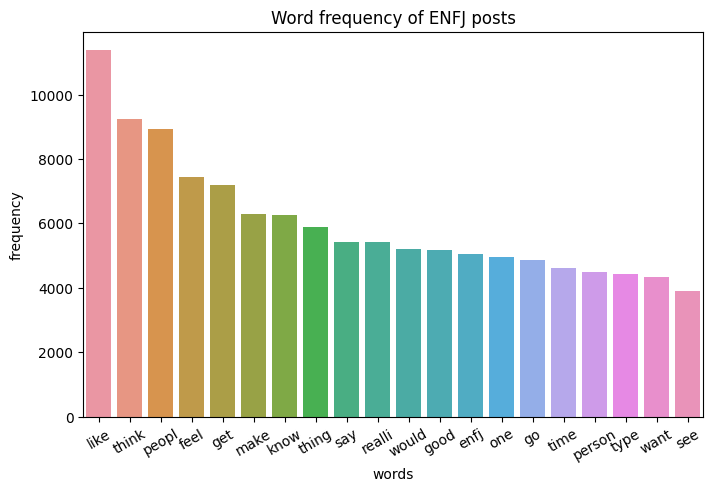

In [18]:
import seaborn as sns

## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = word_freq.most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(8,5))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Word frequency of ENFJ posts")

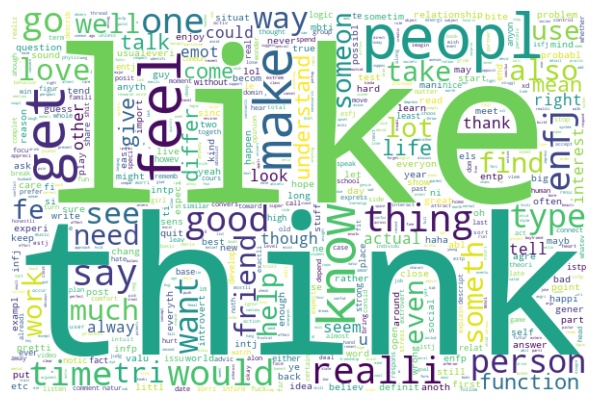

In [19]:
from wordcloud import WordCloud
wc = WordCloud(background_color='white', width=600, height=400, max_words=1000).generate_from_frequencies(word_freq)
plt.figure(figsize=(20, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## ISTJ posts

In [20]:
group_istj = groups.get_group("ISTJ").reset_index(drop=True)
group_istj

posts  type
0     want create entj isfj one lolz please let star...  ISTJ
1     click bias obviously definitely learn play gui...  ISTJ
2     description actually istps though also see unn...  ISTJ
3     interest story take couple paragraph warm some...  ISTJ
4     righteous however even flaw one perfect every ...  ISTJ
...                                                 ...   ...
1238  day try come career path sure color ask answer...  ISTJ
1239  skycloud pride aware thank abbiscuits actually...  ISTJ
1240  actually come affectionate verbally affirm ist...  ISTJ
1241  theatrical trailer unite artist youtube top dr...  ISTJ
1242  feel motivate u oh yes drive perfection downsi...  ISTJ

[1243 rows x 2 columns]

In [21]:
istj_posts = ""
for i in range(group_istj.shape[0]):
    istj_posts += group_istj['posts'].iloc[i]

In [22]:
word_freq_istj = preprocess_text(istj_posts)

In [23]:
word_freq_istj

FreqDist({'like': 9135, 'get': 6579, 'think': 6458, 'peopl': 5650, 'go': 5099, 'thing': 4795, 'time': 4776, 'make': 4616, 'know': 4596, 'would': 4508, ...})

Text(0.5, 1.0, 'Word frequency of ISTJ posts')

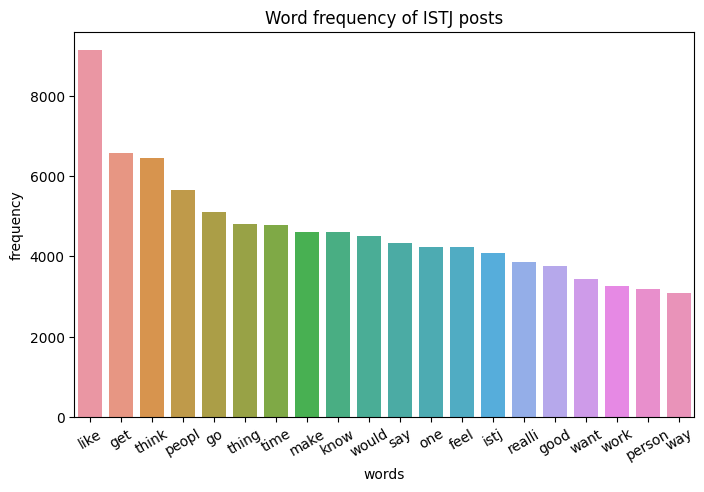

In [24]:
## Creating FreqDist for whole BoW, keeping the 20 most common tokens
all_fdist = word_freq_istj.most_common(20)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(8,5))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Word frequency of ISTJ posts")

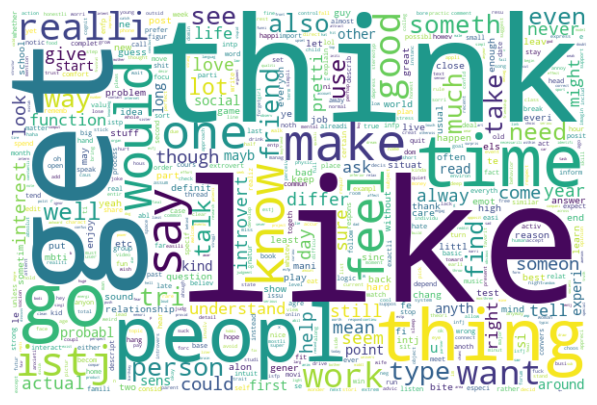

In [25]:
wc = WordCloud(background_color='white', width=600, height=400, max_words=1000).generate_from_frequencies(word_freq_istj)
plt.figure(figsize=(20, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## ISFJ posts

In [26]:
group_isfj = groups.get_group("ISFJ").reset_index(drop=True)
group_isfj

posts  type
0    like spring feel energetic season whatever rea...  ISFJ
1    ridiculous like stress angry think straight ge...  ISFJ
2    call muiple people bid save face slowly realiz...  ISFJ
3    talk etc end coworkers friend ask hang day rea...  ISFJ
4    ive try learn pick feel apart constantly like ...  ISFJ
..                                                 ...   ...
645  ago think enfp ambitious friendly enthusiastic...  ISFJ
646  opinion ugh mean quote fluffytheanarchist prob...  ISFJ
647  diamond best woman like black pearl cologne me...  ISFJ
648  legally drink awful stuff throw happen drink m...  ISFJ
649  driver get little lg phone activate smartphone...  ISFJ

[650 rows x 2 columns]

In [27]:
isfj_posts = ""
for i in range(group_isfj.shape[0]):
    isfj_posts += group_isfj['posts'].iloc[i]

In [28]:
word_freq_isfj = preprocess_text(isfj_posts)

In [29]:
word_freq_isfj

FreqDist({'like': 5141, 'think': 4149, 'peopl': 3454, 'get': 3305, 'thing': 2853, 'feel': 2643, 'make': 2573, 'isfj': 2570, 'say': 2483, 'know': 2424, ...})

Text(0.5, 1.0, 'Word frequency of ISFJ posts')

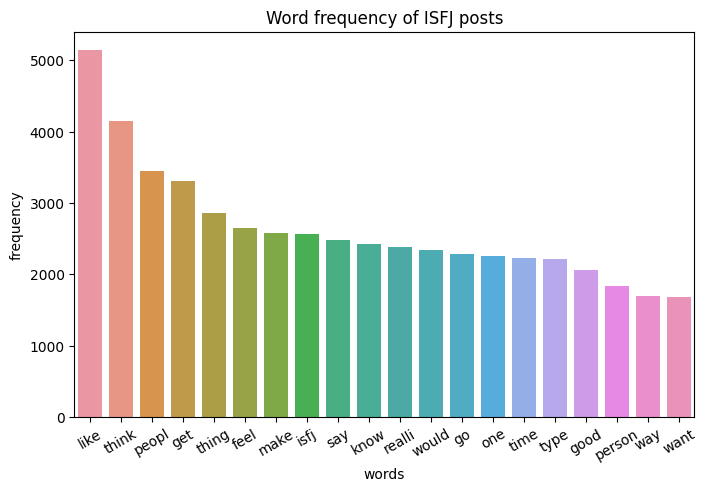

In [30]:
all_fdist = word_freq_isfj.most_common(20)
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(8,5))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Word frequency of ISFJ posts")

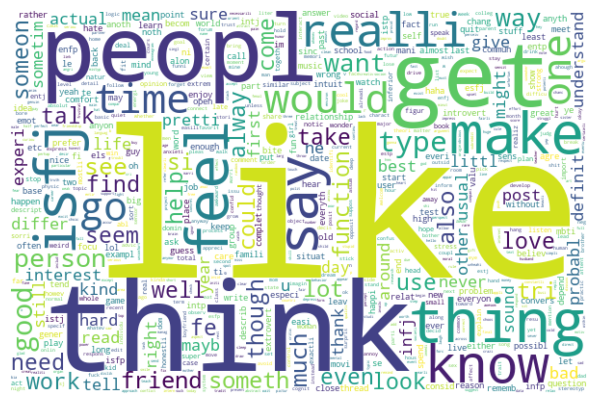

In [31]:
wc = WordCloud(background_color='white', width=600, height=400, max_words=1000).generate_from_frequencies(word_freq_isfj)
plt.figure(figsize=(20, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## ESTJ posts

In [32]:
group_estj = groups.get_group("ESTJ").reset_index(drop=True)
group_estj

posts  type
0    interest question well dress jean crop sunny w...  ESTJ
1    jeg forstår ikke hvorfor vi skulle så meget im...  ESTJ
2    enjoy large group friend want blend crowd joke...  ESTJ
3    conversation kinect camera support k webcam su...  ESTJ
4    definitely give managerial get shit get fuck v...  ESTJ
..                                                 ...   ...
477  awesome site carefully plan schedule sorry xd ...  ESTJ
478  probably save worth food buy anymore even buy ...  ESTJ
479  outside greece care one greek imigrants care c...  ESTJ
480  much without say qustion infjs make u people i...  ESTJ
481  new fresh relationship sure go handle pull awa...  ESTJ

[482 rows x 2 columns]

In [33]:
estj_posts = ""
for i in range(group_estj.shape[0]):
    estj_posts += group_estj['posts'].iloc[i]

In [34]:
word_freq_estj = preprocess_text(estj_posts)

In [35]:
word_freq_estj

FreqDist({'like': 2955, 'think': 2885, 'peopl': 2083, 'get': 1889, 'type': 1851, 'det': 1749, 'er': 1736, 'would': 1522, 'make': 1505, 'say': 1476, ...})

Text(0.5, 1.0, 'Word frequency of ESTJ posts')

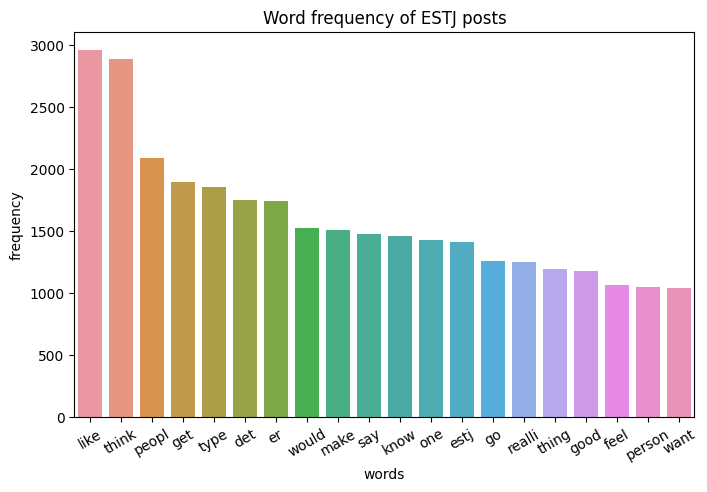

In [36]:
all_fdist = word_freq_estj.most_common(20)
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(8,5))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Word frequency of ESTJ posts")

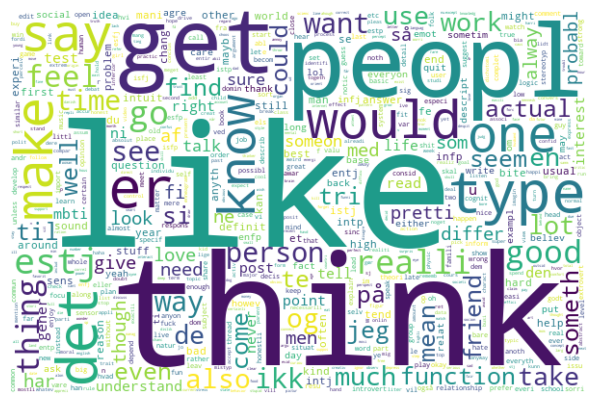

In [37]:
wc = WordCloud(background_color='white', width=600, height=400, max_words=1000).generate_from_frequencies(word_freq_estj)
plt.figure(figsize=(20, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## INTP Posts

In [38]:
group_intp = groups.get_group("INTP").reset_index(drop=True)
group_intp

posts  type
0      watch bite everything include hentai tend enjo...  INTP
1      like goal personally appeal probably wrong see...  INTP
2      fill unfortunately read habit want learn prefe...  INTP
3      people idea reason enjoy leadership role like ...  INTP
4      state grievance ego lack skill find polarize w...  INTP
...                                                  ...   ...
24956  rational one specific individual way express o...  INTP
24957  go part time lover extra lover interest see is...  INTP
24958  frustration think much little want doer want p...  INTP
24959  cuure offer case come place never depend many ...  INTP
24960  friend meaningful human interaction speak ha g...  INTP

[24961 rows x 2 columns]

In [39]:
intp_posts = ""
for i in range(group_intp.shape[0]):
    intp_posts += group_intp['posts'].iloc[i]

In [40]:
word_freq_intp = preprocess_text(intp_posts)

Text(0.5, 1.0, 'Word frequency of INTP posts')

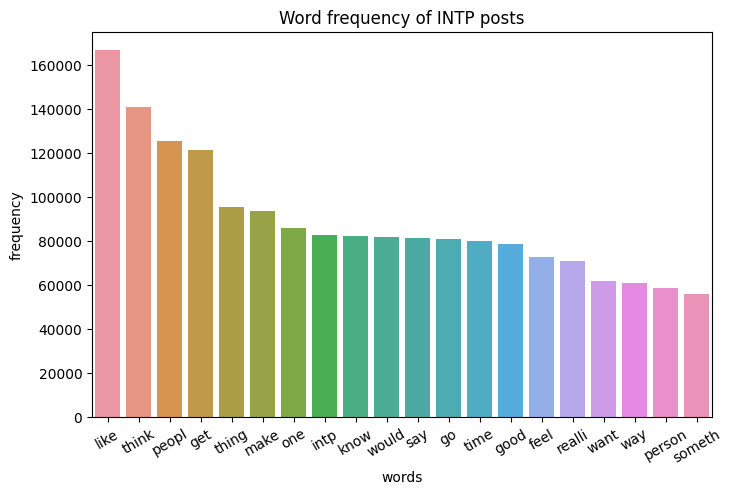

In [41]:
all_fdist = word_freq_intp.most_common(20)
all_fdist = pd.Series(dict(all_fdist))
fig, ax = plt.subplots(figsize=(8,5))

all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=30)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("Word frequency of INTP posts")

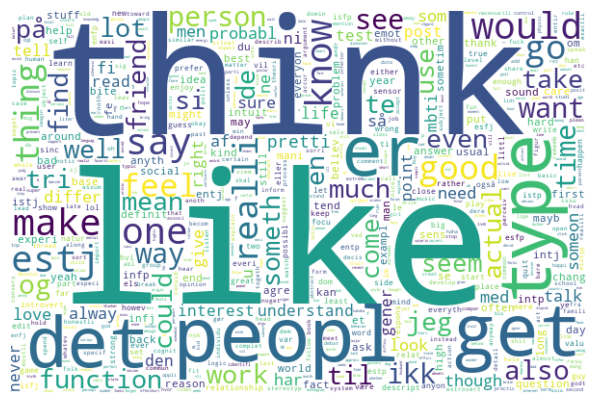

In [42]:
wc = WordCloud(background_color='white', width=600, height=400, max_words=1000).generate_from_frequencies(word_freq_estj)
plt.figure(figsize=(20, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Other Posts

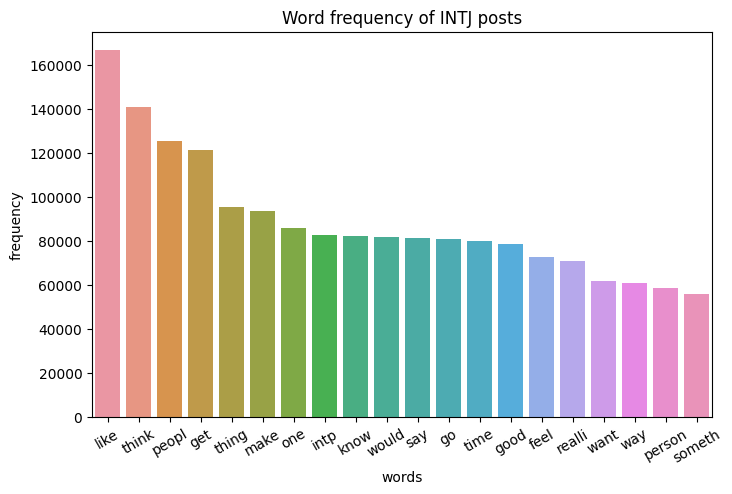

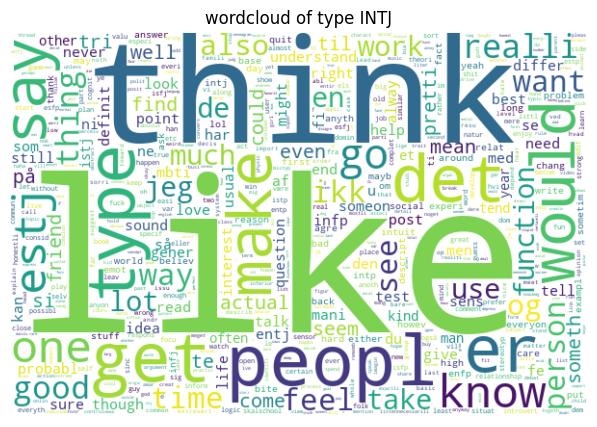

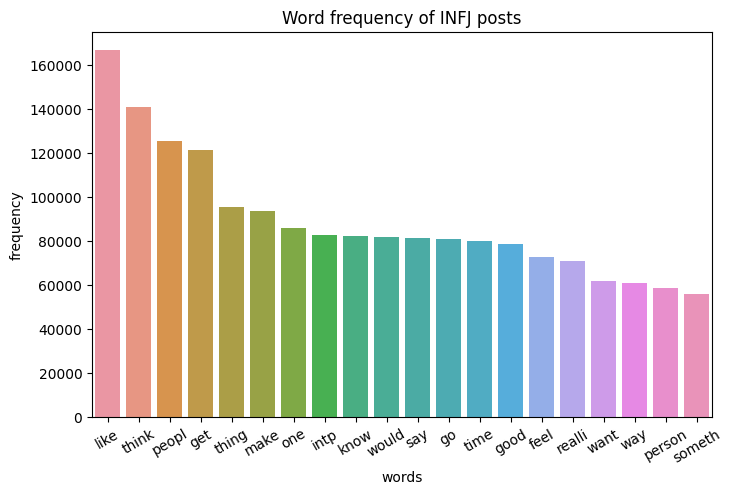

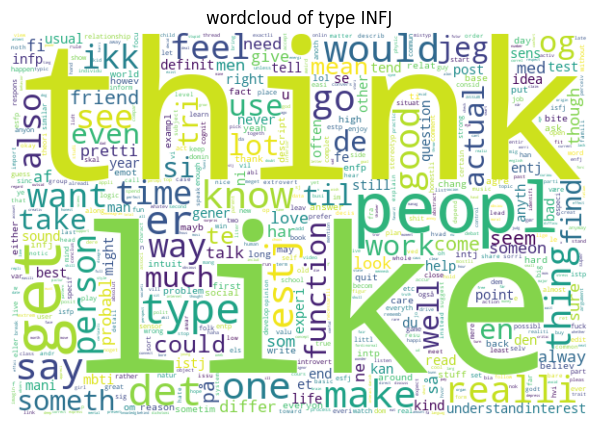

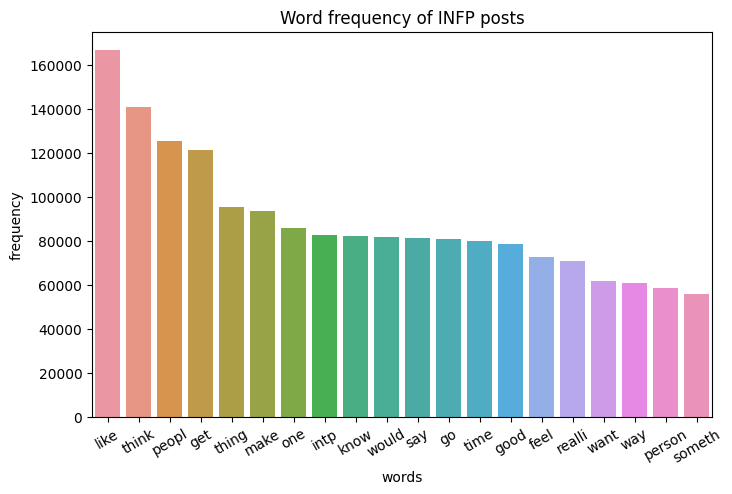

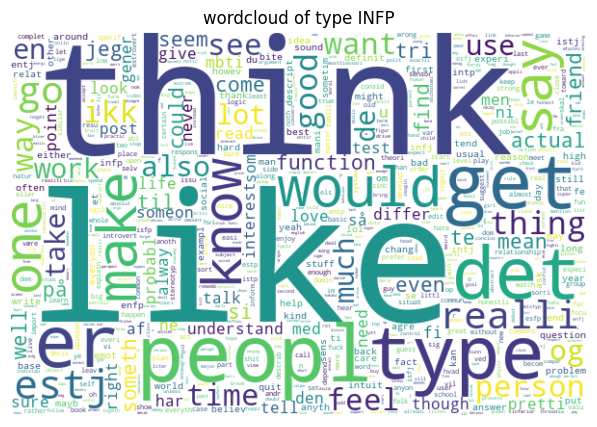

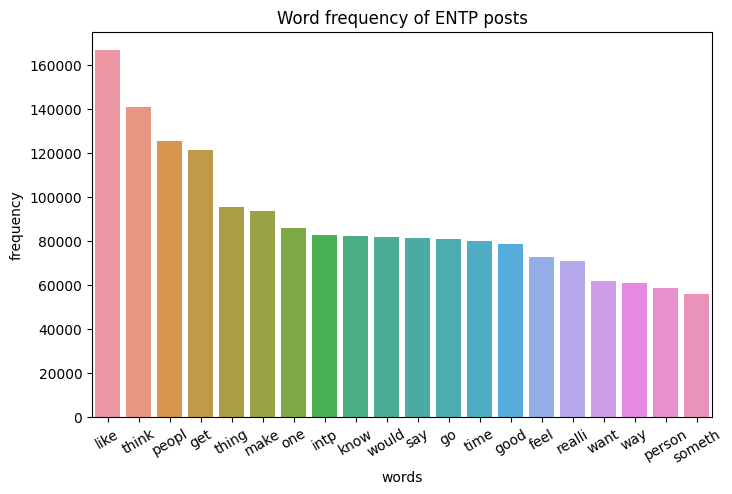

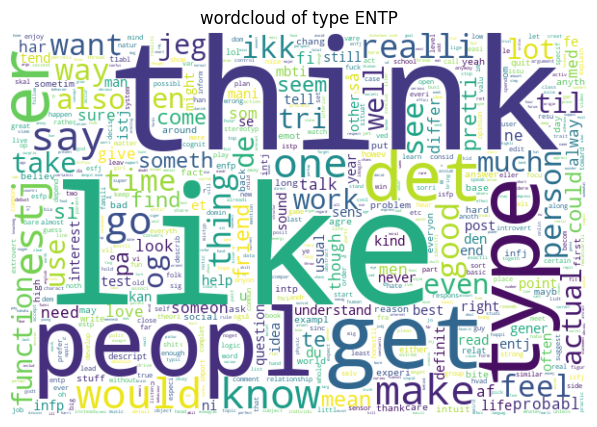

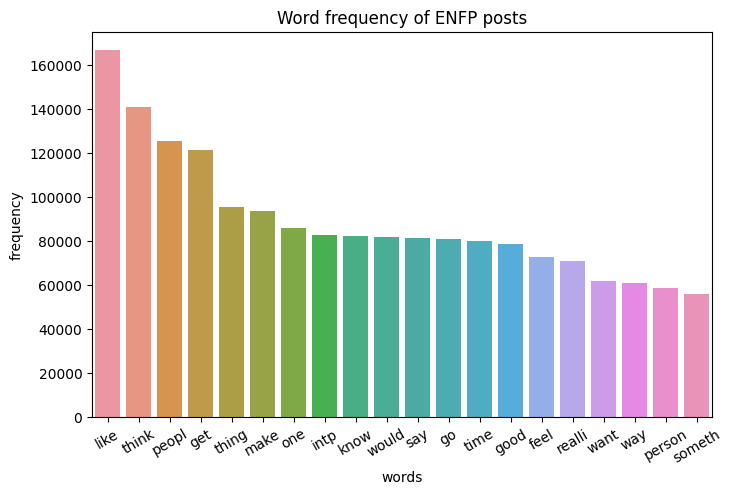

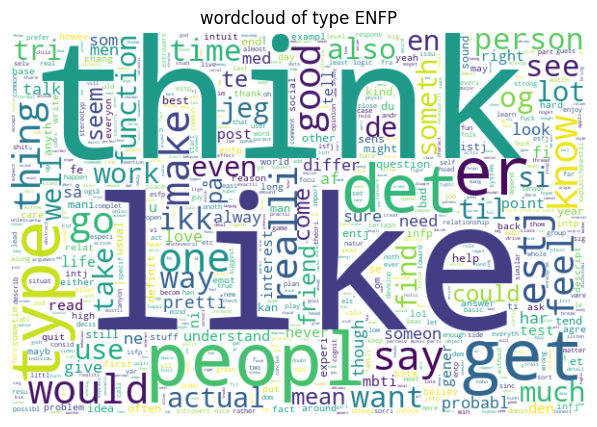

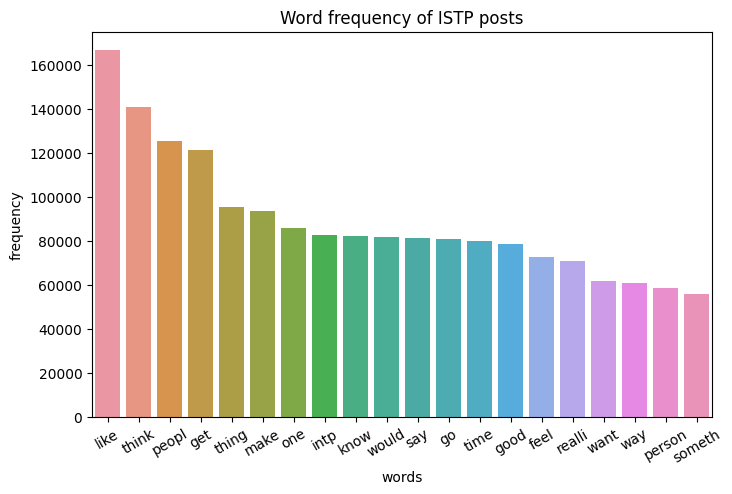

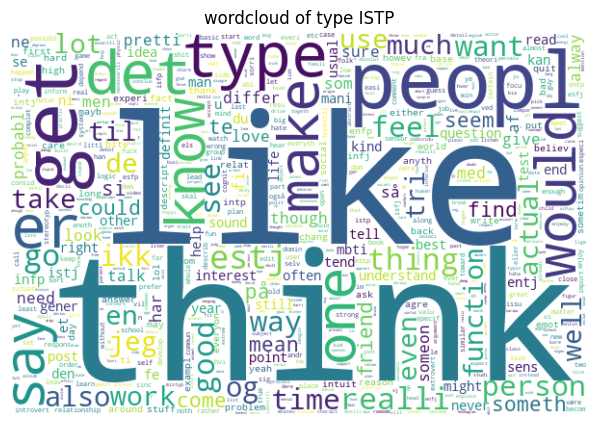

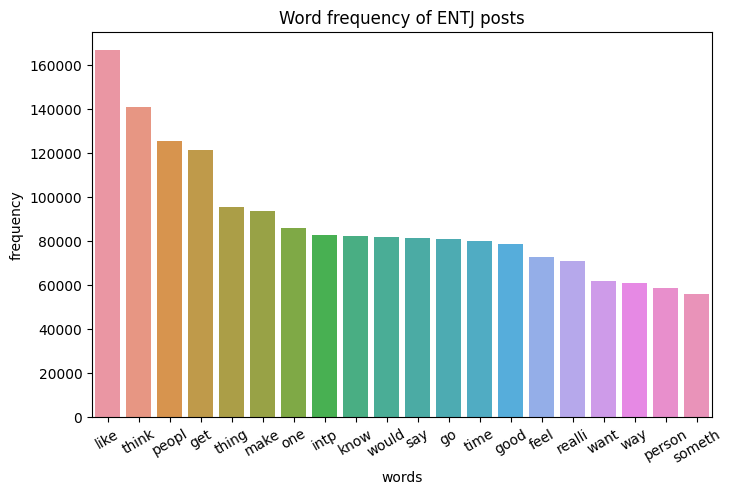

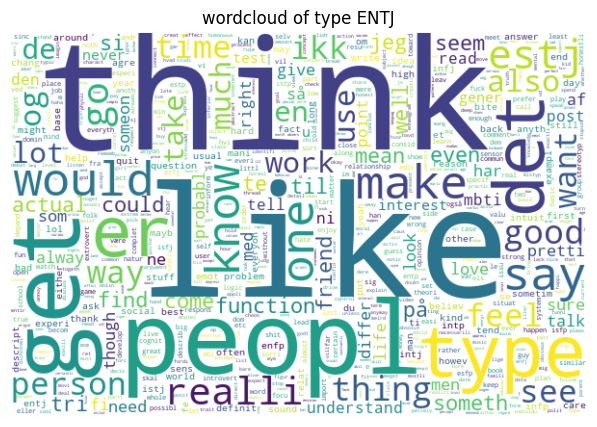

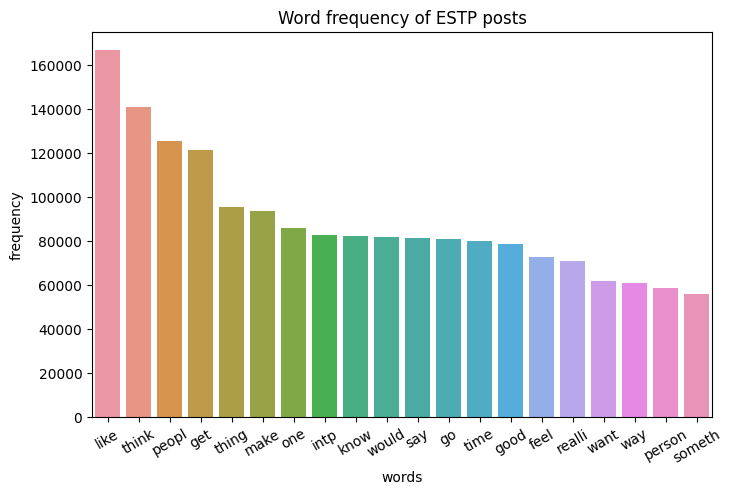

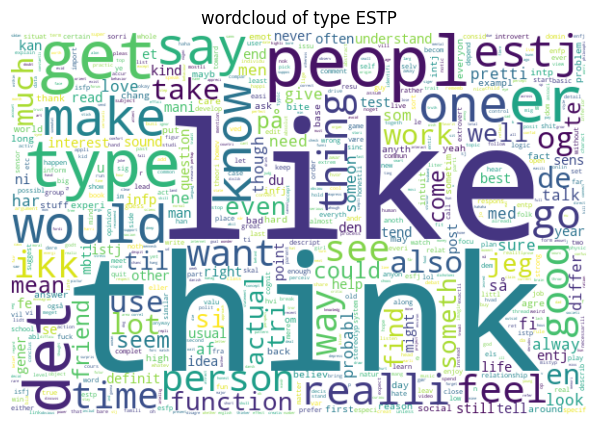

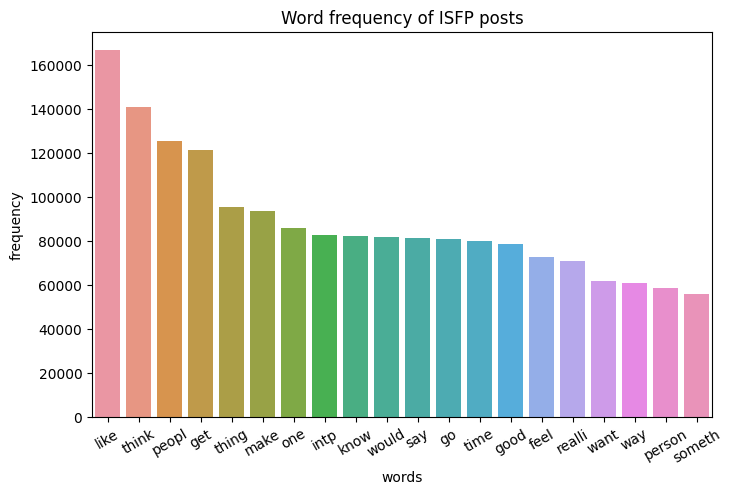

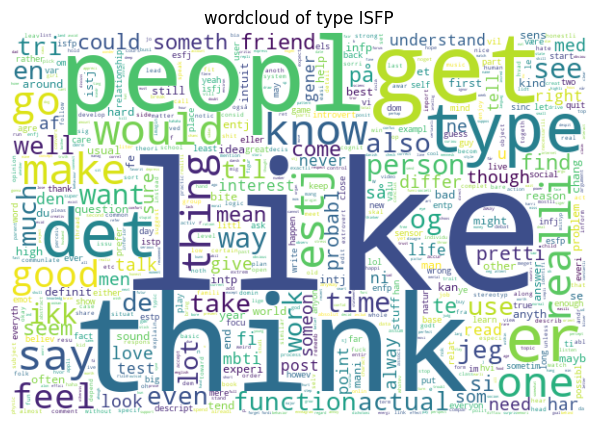

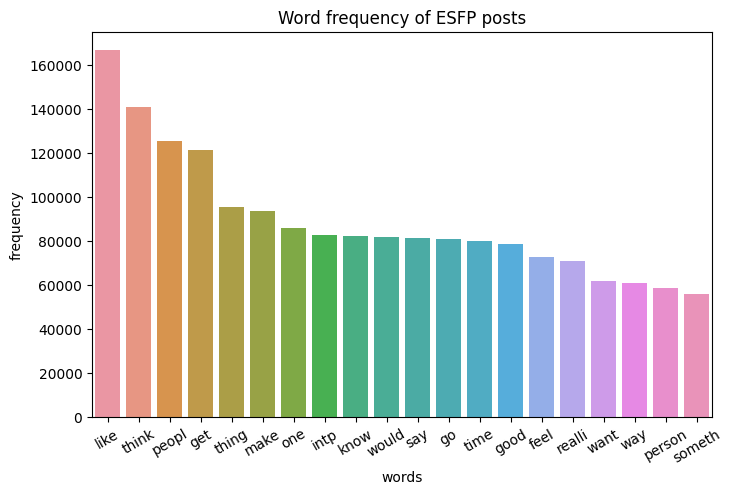

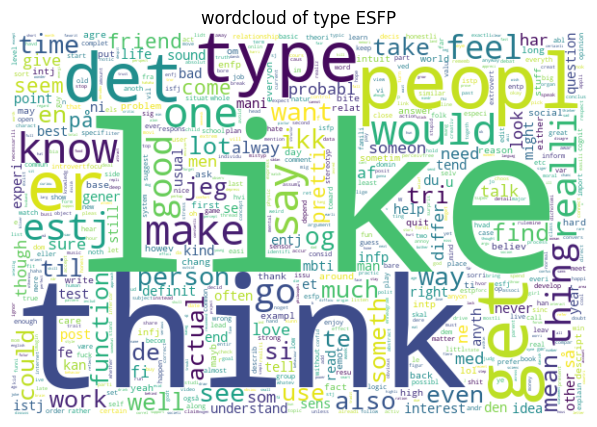

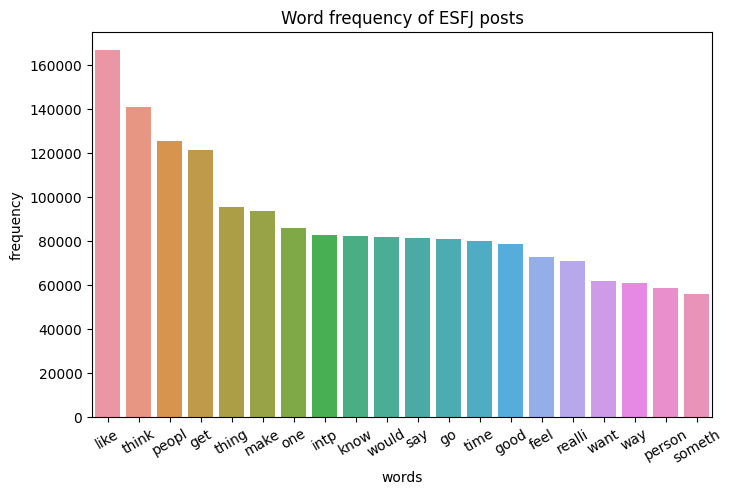

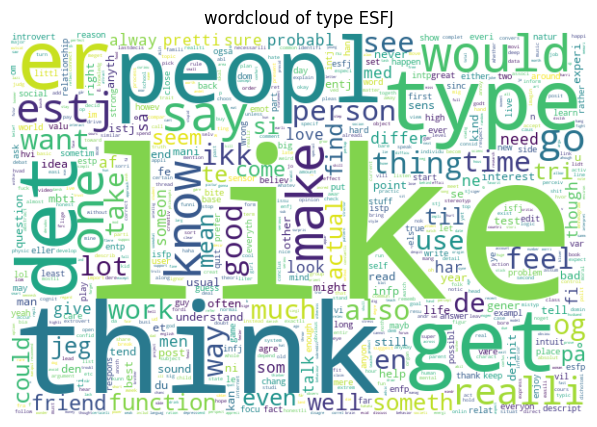

In [45]:
type_list = ['INTJ', 'INFJ', 'INFP', 'ENTP', 'ENFP', 'ISTP', 'ENTJ', 'ESTP', 'ISFP', 'ESFP', 'ESFJ']

for t in type_list: 
    group_post = groups.get_group(t).reset_index(drop=True)
    posts = ""
    for i in range(group_post.shape[0]):
        posts += group_post['posts'].iloc[i]
    word_freq_post = preprocess_text(posts)
    all_fdist = word_freq_intp.most_common(20)
    all_fdist = pd.Series(dict(all_fdist))
    fig, ax = plt.subplots(figsize=(8,5))

    all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
    plt.xticks(rotation=30)
    plt.xlabel("words")
    plt.ylabel("frequency")
    plt.title("Word frequency of {} posts".format(t))
    
    wc = WordCloud(background_color='white', width=600, height=400, max_words=1000).generate_from_frequencies(word_freq_estj)
    plt.figure(figsize=(20, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title("wordcloud of type {}".format(t))
    plt.show()  
    

# Build Model

In [46]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

def preprocess_text(text):
    # replace all HTML tags with ''
    text = re.sub('<.*?>', '', text)
    
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # remove digits
    text = re.sub(r'\d+', '', text)
    
    # convert to lowercase
    text = text.lower()
    
    # tokenize the text
    tokens = word_tokenize(text)
    
    # remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # perform stemming
    stemmer = SnowballStemmer('english')
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
    
    # perform lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in stemmed_tokens]
    
    # join the tokens back into a string
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [47]:
df['cleaned_posts'] = df['posts'].apply(preprocess_text)

In [48]:
df_sampled = df.sample(frac=0.2)

In [49]:
df_sampled.shape

(21213, 3)

In [50]:
df.shape

(106067, 3)

In [51]:
X = df_sampled.iloc[:, -1]
Y = df_sampled.iloc[:, 1]

In [52]:
X

69582     besid know mani peopl call entp entrepreneur t...
19164     sub want read cloth tri button shirt chino pan...
77859     truli second option cuur take often male estp ...
17323     legal stay away event want ruin attend heckl s...
10646     bad case scenario someon forc give birth child...
                                ...                        
103646    anti scienc argument total bull god creat ever...
36758     keep go keep flow hard part approach invit som...
36676     new thing sound like much intp curious would e...
33335     basic someth illog seem logic becom bad becom ...
68190     type type type type type type type type type g...
Name: cleaned_posts, Length: 21213, dtype: object

In [53]:
Y

69582     ENTP
19164     INTJ
77859     ESTP
17323     INTJ
10646     INTJ
          ... 
103646    INFP
36758     INTP
36676     INTP
33335     INTP
68190     ENTP
Name: type, Length: 21213, dtype: object

In [54]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)
print(len(train_x), 'for train')
print(len(test_x), 'for test')

16970 for train
4243 for test


In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_y)

train_y = le.transform(train_y)
test_y = le.transform(test_y)

In [56]:
test_y

array([ 6, 10, 10, ...,  9,  9, 11])

In [59]:
from sklearn.feature_extraction.text import CountVectorizer

coutervectorizer = CountVectorizer()
train_counts_x = coutervectorizer.fit_transform(train_x)
test_counts_x = coutervectorizer.transform(test_x)

In [60]:
test_counts_x.shape

(4243, 77794)

In [61]:
train_counts_x.shape

(16970, 77794)

## Model using Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_counts_x.toarray(), train_y)
hyp = gnb.predict(test_counts_x.toarray())

In [63]:
from sklearn.metrics import accuracy_score

print("Accuracy", accuracy_score(test_y, hyp))

Accuracy 0.3214706575536177


## Model using Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(n_jobs=-1,random_state=100)

params = {'n_estimators':[100],
          'max_depth':[10, 15, 20],
          'max_features':[0.2, 0.4],
          'criterion':["gini","entropy"]}

folds = 5
rf = RandomForestClassifier(random_state=42)
clf = GridSearchCV(rf, params, cv=folds)
clf.fit(train_counts_x, train_y)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 0.2,
 'n_estimators': 100}

In [72]:
hyp = clf.predict(test_counts_x)
print("Accuracy", accuracy_score(test_y, hyp))

Accuracy 0.7105821352816404


## Model using SVM (Support Vector Machine)

TfidfVectorizer calculates the TF-IDF (Term Frequency-Inverse Document Frequency) weight for each word in each document. 

CountVectorizer produces a matrix where the values represent the frequency of each word in each document, while TfidfVectorizer produces a matrix where the values represent the TF-IDF weight of each word in each document.

CountVectorizer does not take into account the rarity of a word in the corpus, while TfidfVectorizer does.

TfidfVectorizer typically produces better results for text classification tasks, since it can give more weight to words that are important for distinguishing between classes.

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidvectorizer = TfidfVectorizer()
train_tfid_x = tfidvectorizer.fit_transform(train_x)
test_tfid_x = tfidvectorizer.transform(test_x)

In [74]:
train_tfid_x.shape

(16970, 77794)

In [75]:
test_tfid_x.shape

(4243, 77794)

In [78]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

clf2 = SVC(kernel='linear')
clf2.fit(train_tfid_x, train_y)

SVC(kernel='linear')

In [79]:
pred = clf2.predict(test_tfid_x)

In [80]:
from sklearn.metrics import classification_report

print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.70      0.42      0.52        55
           1       0.84      0.74      0.79       285
           2       0.84      0.68      0.75       122
           3       0.77      0.78      0.77       450
           4       0.00      0.00      0.00         4
           5       0.83      0.29      0.43        17
           6       0.90      0.69      0.78        26
           7       0.95      0.83      0.89        66
           8       0.80      0.81      0.80       616
           9       0.75      0.80      0.78       492
          10       0.79      0.84      0.81       864
          11       0.79      0.86      0.83       991
          12       0.75      0.33      0.46        18
          13       0.81      0.47      0.60        36
          14       0.84      0.40      0.55        52
          15       0.85      0.65      0.74       149

    accuracy                           0.79      4243
   macro avg       0.76   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [81]:
accuracy = accuracy_score(test_y, pred)
print(accuracy)

0.7925995757718596


## Frozen

In [82]:
frozen_df = pd.read_csv('/Users/liuli/Desktop/ML/MBTI500/frozen_output.csv')

In [83]:
frozen_df

character                                             script
0      ANNA  Elsa. Psst. Elsa! Psst.,Wake up. Wake up. Wake...
1      ELSA  Anna, go back to sleep.,...Go play by yourself...
2  KRISTOFF  Ice?,Faster, Sven!,Trolls...?,What do you want...
3      HANS  I'm so sorry. Are you hurt?,Are you sure?,Oh, ...
4      OLAF  YEAH...It really is beautiful, isn't it? But i...

In [84]:
frozen_df['cleaned_script'] = frozen_df['script'].apply(preprocess_text)

In [85]:
frozen_df

character                                             script  \
0      ANNA  Elsa. Psst. Elsa! Psst.,Wake up. Wake up. Wake...   
1      ELSA  Anna, go back to sleep.,...Go play by yourself...   
2  KRISTOFF  Ice?,Faster, Sven!,Trolls...?,What do you want...   
3      HANS  I'm so sorry. Are you hurt?,Are you sure?,Oh, ...   
4      OLAF  YEAH...It really is beautiful, isn't it? But i...   

                                      cleaned_script  
0  elsa psst elsa psstwake wake wake upi cant sky...  
1  anna go back sleepgo play yourselfwatch thishi...  
2  icefast sventrollswhat want svengiv snackwhat ...  
3  im sorri hurtar sureoh thank goodnessprinc han...  
4  yeahit realli beauti isnt white know littl col...

In [93]:
frozen_tfid_x = tfidvectorizer.transform(frozen_df['cleaned_script'])

In [94]:
frozen_predict = clf2.predict(frozen_tfid_x)

In [95]:
clf2.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [96]:
le.inverse_transform(clf2.classes_)

array(['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP', 'ESTJ', 'ESTP',
       'INFJ', 'INFP', 'INTJ', 'INTP', 'ISFJ', 'ISFP', 'ISTJ', 'ISTP'],
      dtype=object)

In [97]:
frozen_labels = le.inverse_transform(frozen_predict)
print(frozen_labels)

['INFP' 'INFP' 'ENTP' 'INFP' 'INFP']


In [98]:
frozen_df['type '] = frozen_labels 

In [99]:
frozen_df

character                                             script  \
0      ANNA  Elsa. Psst. Elsa! Psst.,Wake up. Wake up. Wake...   
1      ELSA  Anna, go back to sleep.,...Go play by yourself...   
2  KRISTOFF  Ice?,Faster, Sven!,Trolls...?,What do you want...   
3      HANS  I'm so sorry. Are you hurt?,Are you sure?,Oh, ...   
4      OLAF  YEAH...It really is beautiful, isn't it? But i...   

                                      cleaned_script type   
0  elsa psst elsa psstwake wake wake upi cant sky...  INFP  
1  anna go back sleepgo play yourselfwatch thishi...  INFP  
2  icefast sventrollswhat want svengiv snackwhat ...  ENTP  
3  im sorri hurtar sureoh thank goodnessprinc han...  INFP  
4  yeahit realli beauti isnt white know littl col...  INFP

Based on this website: https://www.personality-database.com/search?keyword=Frozen

The votes of ANNA personality type are:<br>
ENFP(1377)<br>
ESFP(358)<br>
ESFJ(140)<br>
ENFJ(27)<br>
<span style="color:blue">INFP(6)</span><br>
ENTP(5)<br>
ENTJ(2)<br>
INFJ(2)<br>
ESTP(1)<br>
INTJ(1)<br>
ISFJ(1)<br>
ISFP(1)<br>
ISTJ(1)<br>


The votes of ELSA personality type are:<br>
INFJ(2060)<br>
ISTJ(1087)<br>
INTJ(310)
<span style="color:blue">INFP(85)</span><br>
ISFJ(59)<br>
ISFP(37)<br>
INTP(9)<br>
ENFJ(7)<br>
ISTP(7)<br>
ENTP(4)<br>
ESTJ(4)<br>
ESTP(4)<br>
ENTJ(2)<br>
ESFJ(2)<br>
ESFP(2)<br>
ENFP(1)<br>


The votes of Kristoff personality type are:<br>
ISTP(492)<br>
ISFP(87)<br>
ISTJ(12)<br>
INFP(8)<br>
ESTP(7)<br>
INFJ(4)<br>
ISFJ(4)<br>
INTP(3)<br>
ESFP(2)<br>
ENFJ(1)<br>
<span style="color:blue">ENTP(1)</span><br>
ESFJ(1)<br>


The votes of of HANS personality type are:<br>
ENFJ(511)<br>
ENTJ(201)<br>
ESTP(16)<br>
ESTJ(10)<br>
ENTP(6)<br>
ESFJ(6)<br>
INTJ(3)<br>
ESFP(2)<br>
INFJ(2)<br>
ISTP(2)<br>


The votes of OLAF personality type are:<br>
ENFP(573)<br>
ESFP(94)<br>
ENTP(35)<br>
ESFJ(7)<br>
ISTJ(4)<br>
INTP(2)<br>
ISFJ(2)<br>
ENFJ(1)<br>
ESTP(1)<br>
<span style="color:blue">INFP(1)</span><br>
INTJ(1)

We can see that different individuals have different interpretations of the same character, and the outward behavior exhibited by each person can also vary in different contexts compared to their typical behavior. 

The occurrence of a particular MBTI type in a dataset could be influenced by various factors, including the creators' interpretation of the characters, their personality traits, and the context in which they are portrayed. It's important to remember that MBTI typing is not an exact science and can be subject to interpretation and personal biases. 

Although MBTI may provide us a fresh perspective on characters, it does not represent the whole reality.

## Endgame

In [103]:
endgame_df = pd.read_csv('/Users/liuli/Desktop/ML/MBTI500/endgame_output.csv')
endgame_df

character                                             script
0       TONY  Good sport. Have fun?,This thing on? Hey, Ms. ...
1     NEBULA  It was fun.,Don’t bother.,I can tell you where...
2      STEVE  Neither could we.,We...lost...,We don’t know. ...
3    NATASHA  World governments are in pieces, as you can im...
4       THOR  I like this one.,I went for the head.,Are you ...
5     THANOS  The universe required correction. After that, ...
6      SCOTT  Hello?,Hey. Kid. What happened here?,What? Cas...
7       HULK  These are confusing times.,I’m kidding, I get ...
8     GAMORA  You’re welcome?,And yet you always need it. Fa...
9      QUILL  Oh, fu-,Gamora?,I thought I lost you.,You miss...
10    HOWARD  Hey, Arnim, you in here?,Hey, I’m looking for ...
11     PEGGY  So, send them in.,Oh, for the love of- I’ll fi...
12     PETER  Mr. Stark. Holy cow, you would not believe wha...
13     WANDA  You took everything from me.,You will.,Don’t w...
14     GROOT                            I am Groot.,I am Groot!

In [104]:
endgame_df['cleaned_script'] = endgame_df['script'].apply(preprocess_text)

In [105]:
endgame_tfid_x = tfidvectorizer.transform(endgame_df['cleaned_script'])

In [106]:
endgame_predict = clf2.predict(endgame_tfid_x)

In [107]:
endgame_labels = le.inverse_transform(endgame_predict)
print(endgame_labels)

['INFJ' 'INTJ' 'INTP' 'INTP' 'INFP' 'INTP' 'INTP' 'INTP' 'INTP' 'ENTP'
 'INTP' 'INTP' 'ENTP' 'INTP' 'INTP']


In [108]:
endgame_df['type '] = endgame_labels 

In [109]:
endgame_df

character                                             script  \
0       TONY  Good sport. Have fun?,This thing on? Hey, Ms. ...   
1     NEBULA  It was fun.,Don’t bother.,I can tell you where...   
2      STEVE  Neither could we.,We...lost...,We don’t know. ...   
3    NATASHA  World governments are in pieces, as you can im...   
4       THOR  I like this one.,I went for the head.,Are you ...   
5     THANOS  The universe required correction. After that, ...   
6      SCOTT  Hello?,Hey. Kid. What happened here?,What? Cas...   
7       HULK  These are confusing times.,I’m kidding, I get ...   
8     GAMORA  You’re welcome?,And yet you always need it. Fa...   
9      QUILL  Oh, fu-,Gamora?,I thought I lost you.,You miss...   
10    HOWARD  Hey, Arnim, you in here?,Hey, I’m looking for ...   
11     PEGGY  So, send them in.,Oh, for the love of- I’ll fi...   
12     PETER  Mr. Stark. Holy cow, you would not believe wha...   
13     WANDA  You took everything from me.,You will.,Don’t w...   
14     GROOT                            I am Groot.,I am Groot!   

                                       cleaned_script type   
0   good sport funthi thing hey m pott pep find re...  INFJ  
1   fundon ’ botheri tell thano isthano spent long...  INTJ  
2   neither could wewelostw ’ know open portal wal...  INTP  
3   world govern piec imagin part still work tri t...  INTP  
4   like onei went headar cablecinemax went two da...  INFP  
5   univers requir correct stone serv purpos beyon...  INTP  
6   hellohey kid happen herewhat cassiecassi cassi...  INTP  
7   confus timesi ’ kid get ’ crazi wear shirt now...  INTP  
8   ’ welcomeand yet alway need father want u back...  INTP  
9   oh fugamorai thought lost youyou miss first ti...  ENTP  
10  hey arnim herehey ’ look dr zola seen himi kno...  INTP  
11  send inoh love ’ find weather project call bra...  INTP  
12  mr stark holi cow would believ ’ go rememb spa...  ENTP  
13      took everyth meyou willdon ’ worri kidsh know  INTP  
14                                       grooti groot  INTP

On this website: https://www.personality-database.com/profile?pid=2&cid=27&sub_cat_id=38052<br>

Take two roles for example:<br>
the following votes are the audience's decision on how these characters performed in all Marvel movies.

The votes of <b>Peter Quill “Star-Lord”</b> personality type are:<br>
ESFP(749)<br>
ENFP(409)<br>
<span style="color:blue">ENTP(132)</span><br>
ESTP(27)<br>
ENFJ(4)<br>
ISFP(3)<br>
ESTJ(2)<br>
INFP(2)<br>
ENTJ(1)<br>
INTJ(1)<br>
INTP(1)<br>
ISTP(1)<br>


The votes of <b>THOR</b> personality type are:
ESTP(1385)<br>
ESFP(1322)<br>
ESFJ(24)<br>
ENFP(12)<br>
ENTP(9)<br>
ENFJ(8)<br>
ESTJ(7)<br>
ISTP(3)<br>
ENTJ(2)<br>
<span style="color:blue">INFP(2)</span><br>
INTJ(2)<br>
INTP(2)<br>
ISFJ(2)<br>
ISFP(2)<br>
ISTJ(2)<br>
INFJ(1)<br>

In [ ]:
endgame_df['type '].value_counts()

Also, we can observe that the majority of the MBTI of the 'endgame' are INTP. The strengths of INTP characteristics are (1)logical and objective (2) abstract thinker (3) independent (4) loyal and affectionate with loved ones. The weakness of INTP are (1)difficult to get to know (2) can be insensitive (3) prone to self-doubt (4) struggling to follow rules.

I think that makes sense, and in Endgame, INTP-type characters exhibit these traits. In Endgame, these characters reveal their unique personalities and behaviors. They may solve problems through cool, logical thinking, displaying thoughtful abstract ideas. They tend to have their own independent ways and methods, not influenced by others. At the same time, they may face emotional struggles and inner self-doubt. Together, these factors shape the representation and development of INTP-type characters in the story.

Everyone's understanding and perspective on roles will also vary due to personal experiences and prejudices.